In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.ticker as mticker
import matplotlib
import matplotlib.dates as mdates
import numpy as np

sns.set(font_scale=1.4)
sns.set_style('whitegrid')

In [2]:
train_data = pd.read_csv('archive/train.csv')
valid_data = pd.read_csv('archive/valid.csv')

In [3]:
def date_to_datetime(arg):
    return datetime.strptime(arg, '%Y-%m-%d %H:%M:%S')

In [4]:
train_data['CreationDate'] = train_data['CreationDate'].map(date_to_datetime)
train_data.sort_values('Y', inplace=True)

In [5]:
valid_data['CreationDate'] = valid_data['CreationDate'].map(date_to_datetime)
valid_data.sort_values('Y', inplace=True)

# EDA

## Labels distribution

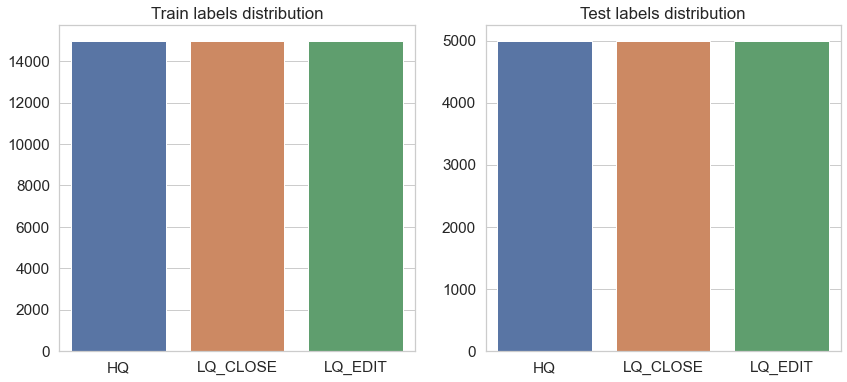

In [6]:
train_Y_vc = train_data['Y'].value_counts()
valid_Y_vc = valid_data['Y'].value_counts()


fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(x=train_Y_vc.index, y=train_Y_vc.values, ax=axes[0])
axes[0].set_title('Train labels distribution')
sns.barplot(x=valid_Y_vc.index, y=valid_Y_vc.values, ax=axes[1])
axes[1].set_title('Test labels distribution')
plt.show()

#### Summary
 - Counts of labels are equal each other for both train and test datasets
 - Train dataset 3x times larger than test

In [7]:
datasets = [('Train', train_data), ('Test', valid_data)]

## Dates distribution

### Days distribution

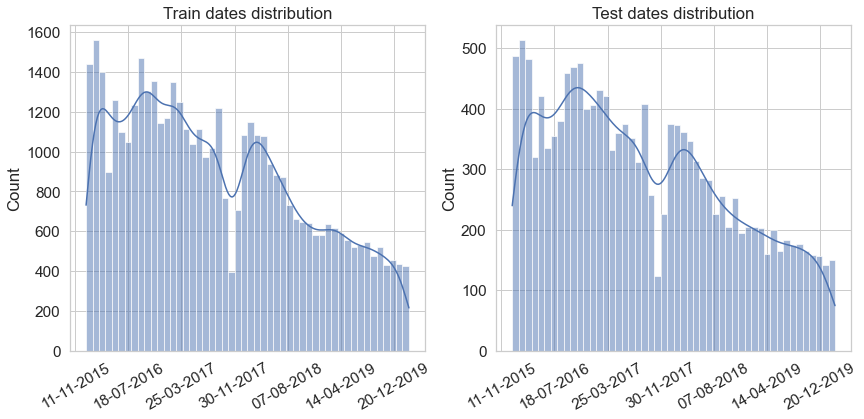

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
for idx, (dataset_name, dataset) in enumerate(datasets):
    CD_data = dataset['CreationDate'].sort_values()
    def get_date(arg):
        return arg.date()
    CD_data_mapped = CD_data.map(get_date)
    sns.histplot(x=mdates.date2num(CD_data_mapped), bins=50, kde=True, ax=axes[idx])
    axes[idx].set_title(f'{dataset_name} dates distribution')
    plt.setp(axes[idx].xaxis.get_ticklabels(), rotation=30)
    myFmt = mdates.DateFormatter('%d-%m-%Y')
    axes[idx].xaxis.set_major_formatter(myFmt)
plt.show()

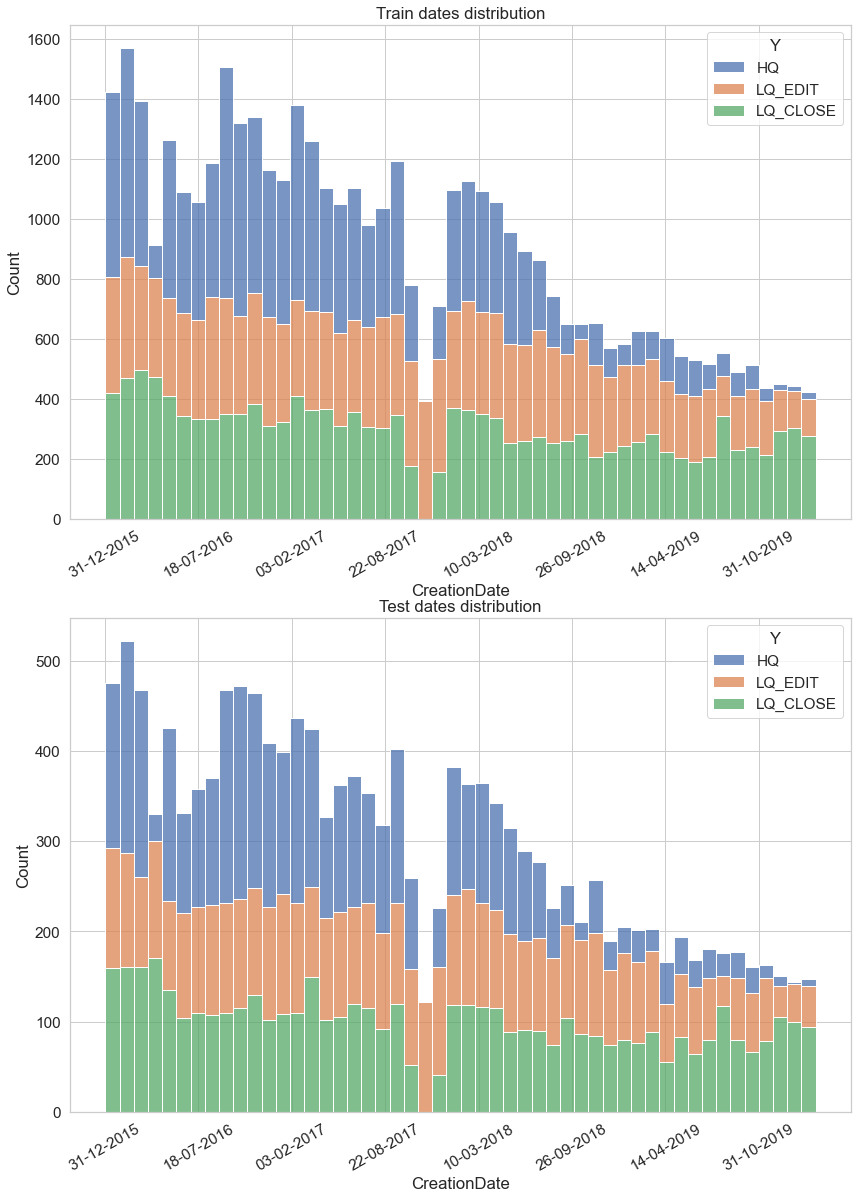

Timeframes with only LQ_EDIT samples:
Train dataset : [2017-10-17 08:06:29, 2017-12-15 16:32:28]
Test dataset : [2017-10-17 05:57:57, 2017-12-15 18:01:33]


In [29]:
palette = {'HQ': 'C0', 'LQ_EDIT': 'C1', 'LQ_CLOSE': 'C2'}
hue_order = ['HQ', 'LQ_EDIT', 'LQ_CLOSE']
anomaly_timeframes = {}

def search_anomaly_timeframe_bounds(CD_data):
    max_length = 0
    current_length = 0
    is_in_sector = False
    start_sector_idx = None
    max_start_sector_idx = None
    max_finish_sector_idx = None
    CD_data = CD_data.copy()
    for index, row in CD_data.iterrows():
        if row['Y'] == 'LQ_EDIT':
            if is_in_sector:
                current_length += 1
            else:
                is_in_sector = True
                current_length = 1
                start_sector_idx = index
        else:
            if current_length > max_length:
                max_length = current_length
                max_start_sector_idx = start_sector_idx
                max_finish_sector_idx = index
            is_in_sector = False
    return CD_data['CreationDate'][max_start_sector_idx], CD_data['CreationDate'][max_finish_sector_idx]
    
fig, axes = plt.subplots(2, 1, figsize=(14, 20))
for idx, (dataset_name, dataset) in enumerate(datasets):
    CD_data = dataset[['CreationDate', 'Y']].copy()
    CD_data.sort_values(by=['CreationDate'], inplace=True)
    anomaly_timeframes[dataset_name] = search_anomaly_timeframe_bounds(CD_data)
    CD_data['CreationDate'] = mdates.date2num(CD_data['CreationDate'])
    sns.histplot(data=CD_data, x='CreationDate', bins=50, multiple='stack', hue='Y', ax=axes[idx], 
                 palette=palette, hue_order=hue_order)
    axes[idx].set_title(f'{dataset_name} dates distribution')
    plt.setp(axes[idx].xaxis.get_ticklabels(), rotation=30)
    myFmt = mdates.DateFormatter('%d-%m-%Y')
    axes[idx].xaxis.set_major_formatter(myFmt)
plt.show()

print('Timeframes with only LQ_EDIT samples:')
for key, value in anomaly_timeframes.items():
    print(f'{key} dataset : [{value[0]}, {value[1]}]')


#### Summary
 - The graphs show the decrease in the number of HQ labels over time
 - Timeframe with only LQ_EDIT exists in both train and test datasets

### Daytimes distribution

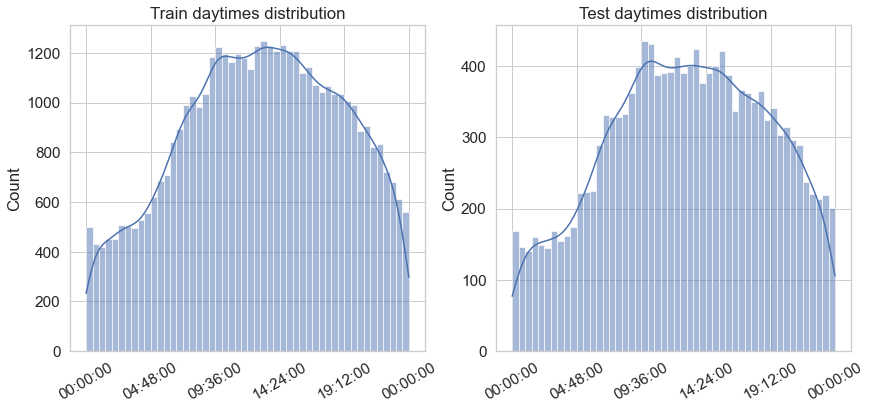

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
for idx, (dataset_name, dataset) in enumerate(datasets):
    CD_vc = dataset['CreationDate']
    def get_daytime(arg):
        str_time = arg.replace(year=2020, day=1, month=1)
        return str_time
    CD_vc_mapped = CD_vc.map(get_daytime).sort_values()
    sns.histplot(x=mdates.date2num(CD_vc_mapped), bins=50, kde=True, ax=axes[idx])
    axes[idx].set_title(f'{dataset_name} daytimes distribution')
    plt.setp(axes[idx].xaxis.get_ticklabels(), rotation=30)
    myFmt = mdates.DateFormatter('%H:%M:%S')
    axes[idx].xaxis.set_major_formatter(myFmt)
plt.show()

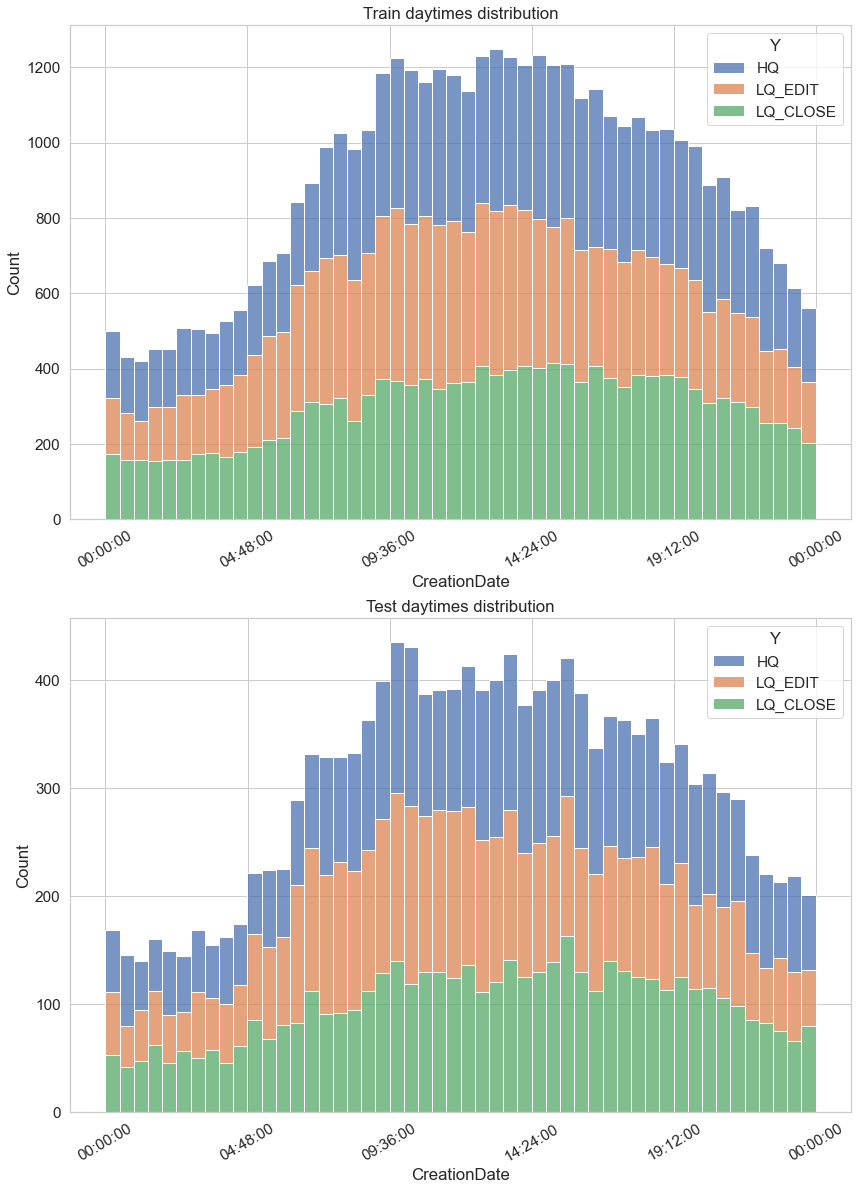

In [11]:
palette = {'HQ': 'C0', 'LQ_EDIT': 'C1', 'LQ_CLOSE': 'C2'}
hue_order = ['HQ', 'LQ_EDIT', 'LQ_CLOSE']

fig, axes = plt.subplots(2, 1, figsize=(14, 20))
for idx, (dataset_name, dataset) in enumerate(datasets):
    CD_vc = dataset[['CreationDate', 'Y']].copy()
    def get_daytime(arg):
        str_time = arg.replace(year=2020, day=1, month=1)
        return str_time
    CD_vc['CreationDate'] = CD_vc['CreationDate'].map(get_daytime)
    CD_vc.sort_values(by=['CreationDate'])
    CD_vc['CreationDate'] = mdates.date2num(CD_vc['CreationDate'])
    sns.histplot(data=CD_vc, x='CreationDate', bins=50, multiple='stack', hue='Y', ax=axes[idx],
                palette=palette, hue_order=hue_order)
    axes[idx].set_title(f'{dataset_name} daytimes distribution')
    plt.setp(axes[idx].xaxis.get_ticklabels(), rotation=30)
    myFmt = mdates.DateFormatter('%H:%M:%S')
    axes[idx].xaxis.set_major_formatter(myFmt)
plt.show()

#### Summary
 - No insights

## Tags

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
for idx, (dataset_name, dataset) in enumerate(datasets):
    CD_vc = dataset['Tags'].value_counts().sort_index()